In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate monthly mortgage payment
def calculate_monthly_payment(loan, rate, term):
    """
    Calculate the monthly mortgage payment.

    Parameters:
    loan (float): The total loan amount (principal) in dollars.
    rate (float): The annual interest rate as a percentage (e.g., 3.5 for 3.5%).
    term (int): The loan term in years.

    Returns:
    float: The monthly payment amount in dollars.
    """
    monthly_rate = rate / 12 / 100  # Convert annual rate to monthly rate (decimal form)
    num_payments = term * 12  # Total number of monthly payments
    payment = loan * (monthly_rate * (1 + monthly_rate) ** num_payments) / ((1 + monthly_rate) ** num_payments - 1)
    return payment

def mortgage_analysis(loan, rate, term):
    """
    Analyze the mortgage details and generate an amortization schedule.

    Parameters:
    loan (float): The total loan amount (principal) in dollars.
    rate (float): The annual interest rate as a percentage (e.g., 3.5 for 3.5%).
    term (int): The loan term in years.

    Returns:
    tuple: A tuple containing:
        - df_amortization (pd.DataFrame): A dataframe with the amortization schedule, including:
            * Month: The month number (1 to total months).
            * Beginning Balance: The loan balance at the beginning of the month.
            * Monthly Payment: The fixed monthly payment amount.
            * Monthly Interest: The interest portion of the monthly payment.
            * Principal Repayment: The principal portion of the monthly payment.
            * Ending Balance: The loan balance at the end of the month.
        - total_interest (float): The total interest paid over the life of the loan.
        - total_payments (float): The total amount paid (principal + interest) over the life of the loan.
    """
    # Calculate monthly payment
    monthly_payment = calculate_monthly_payment(loan, rate, term)

    # Create dataframe for amortization schedule
    data = []
    balance = loan
    monthly_rate = rate / 12 / 100
    for month in range(1, term * 12 + 1):
        interest = balance * monthly_rate
        principal = monthly_payment - interest
        ending_balance = balance - principal
        data.append([month, balance, monthly_payment, interest, principal, ending_balance])
        balance = ending_balance

    columns = ['Month', 'Beginning Balance', 'Monthly Payment', 'Monthly Interest', 'Principal Repayment', 'Ending Balance']
    df_amortization = pd.DataFrame(data, columns=columns)

    # Calculate total interest and total payments
    total_interest = df_amortization['Monthly Interest'].sum()
    total_payments = df_amortization['Monthly Payment'].sum()
    total_principal_paid = df_amortization['Principal Repayment'].sum()
    interest_saved = 0  # No prepayments in this analysis

    # Print results
    print(f"Monthly Payment: {monthly_payment:.2f}")
    print(f"Total Interest Paid: {total_interest:.2f}")
    print(f"Total Principal Paid: {total_principal_paid:.2f}")
    print(f"Total Payments Made: {total_payments:.2f}")
    print(f"Interest Saved Due to Prepayments: {interest_saved:.2f}")


    # Plot monthly principal vs monthly interest
    plt.figure(figsize=(10, 6))
    plt.plot(df_amortization['Month'], df_amortization['Monthly Interest'], label='Monthly Interest', color='red')
    plt.plot(df_amortization['Month'], df_amortization['Principal Repayment'], label='Principal Repayment', color='blue')
    plt.xlabel('Month')
    plt.ylabel('Amount ($)')
    plt.title('Monthly Principal vs Monthly Interest Over Time')
    plt.legend()
    plt.grid()
    plt.show()

    return df_amortization, total_interest, total_payments


In [48]:
calculate_monthly_payment(loan=700000, rate=6.125, term=30)

4253.273777064836

Monthly Payment: 4253.27
Total Interest Paid: 831178.56
Total Principal Paid: 700000.00
Total Payments Made: 1531178.56
Interest Saved Due to Prepayments: 0.00


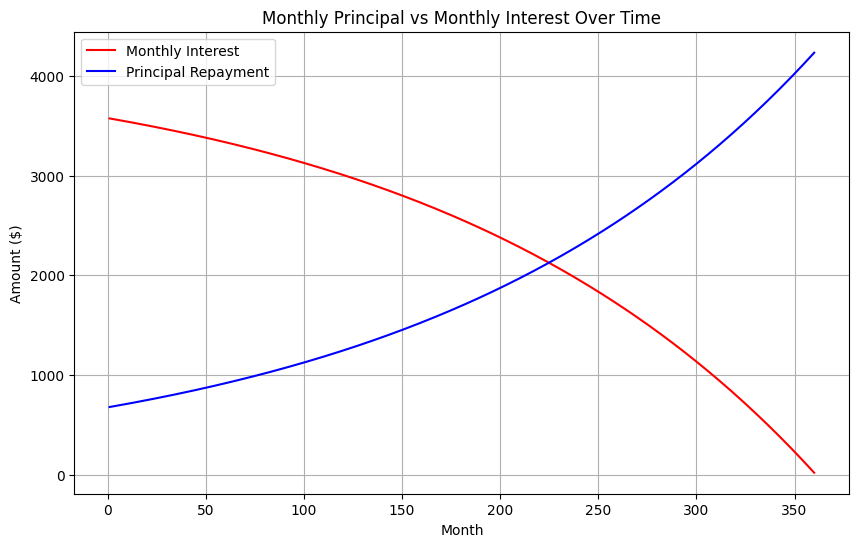

(     Month  Beginning Balance  Monthly Payment  Monthly Interest  \
 0        1      700000.000000      4253.273777       3572.916667   
 1        2      699319.642890      4253.273777       3569.444011   
 2        3      698635.813123      4253.273777       3565.953629   
 3        4      697948.492976      4253.273777       3562.445433   
 4        5      697257.664631      4253.273777       3558.919330   
 ..     ...                ...              ...               ...   
 355    356       20944.566679      4253.273777        106.904559   
 356    357       16798.197461      4253.273777         85.740800   
 357    358       12630.664483      4253.273777         64.469017   
 358    359        8441.859723      4253.273777         43.088659   
 359    360        4231.674605      4253.273777         21.599172   
 
      Principal Repayment  Ending Balance  
 0             680.357110    6.993196e+05  
 1             683.829766    6.986358e+05  
 2             687.320148    6.979485e

In [47]:
mortgage_analysis(loan=700000, rate=6.125, term=30)

In [62]:
def mortgage_analysis_with_prepayment(loan, rate, term, prepayment_type, m, std_dev=0):
    """
    Analyze the mortgage details with additional monthly prepayment.

    Parameters:
    loan (float): The total loan amount (principal) in dollars.
    rate (float): The annual interest rate as a percentage (e.g., 3.5 for 3.5%).
    term (int): The loan term in years.
    prepayments (list): A list of prepayment amounts for each month over the specified term.

    Returns:
    tuple: A tuple containing:
        - df_amortization (pd.DataFrame): A dataframe with the amortization schedule, including:
            * Month: The month number (1 to total months).
            * Beginning Balance: The loan balance at the beginning of the month.
            * Monthly Payment: The fixed monthly payment amount.
            * Monthly Interest: The interest portion of the monthly payment.
            * Principal Repayment: The principal portion of the monthly payment.
            * Prepayment: The additional principal payment made. In case the prepayment exceeds the remaining balance, it is capped at the remaining balance.
            * Ending Balance: The loan balance at the end of the month.
        - total_interest (float): The total interest paid over the life of the loan.
        - total_payments (float): The total amount paid (principal + interest) over the life of the loan.
        - interest_saved (float): The amount of interest saved due to prepayments.
    """
    num_months = term * 12  # Convert term in years to months
    if prepayment_type == 'constant':
        prepayments = [m] * num_months
    elif prepayment_type == 'random':
        mu = np.log(m**2 / np.sqrt(m**2 + std_dev**2))  # Mean of the underlying normal distribution
        sigma = np.sqrt(np.log(1 + (std_dev**2 / m**2))) 
        prepayments = [max(0, np.random.lognormal(mean=mu, sigma=sigma)) for _ in range(num_months)]  # Ensure prepayment is non-negative
    else:
        raise ValueError("Invalid prepayment_type. Choose 'constant' or 'random'.")

    # Calculate monthly payment
    monthly_payment = calculate_monthly_payment(loan, rate, term)

    # Create dataframe for amortization schedule
    data = []
    balance = loan
    monthly_rate = rate / 12 / 100
    month = 1

    for i, prepayment in enumerate(prepayments):
        if balance <= 0:
            break
        interest = balance * monthly_rate
        principal = monthly_payment - interest

        # If the balance is less than the monthly payment, adjust the payment and set prepayment to 0
        if balance < monthly_payment:
            principal = balance  # Pay off the remaining balance
            monthly_payment = principal + interest
            prepayment = 0

        balance -= principal  # Deduct principal from balance after monthly payment

        # Ensure the last prepayment is adjusted based on the outstanding balance
        if i == len(prepayments) - 1:
            prepayment = max(prepayment, balance)  # Ensure last prepayment is not 0 and covers the remaining balance
        else:
            prepayment = min(prepayment, balance)  # Ensure prepayment does not exceed remaining balance

        balance -= prepayment  # Deduct prepayment from balance
        ending_balance = max(balance, 0)
        data.append([month, balance + principal + prepayment, monthly_payment, interest, principal, prepayment, ending_balance])
        month += 1

    columns = ['Month', 'Beginning Balance', 'Monthly Payment', 'Monthly Interest', 'Principal Repayment', 'Prepayment', 'Ending Balance']
    df_amortization = pd.DataFrame(data, columns=columns)

    # Calculate total interest and total payments
    total_interest = df_amortization['Monthly Interest'].sum()
    total_payments = df_amortization['Monthly Payment'].sum() + df_amortization['Prepayment'].sum()
    total_prepayments = df_amortization['Prepayment'].sum()
    total_principal_paid = df_amortization['Principal Repayment'].sum()

    # Ensure the sum of principal paid and prepayments equals the loan amount
    assert abs(total_principal_paid + total_prepayments - loan) < 1e-2, "The sum of principal paid and prepayments does not equal the loan amount."

    # Calculate interest without prepayments
    _, total_interest_without_prepayments, _ = mortgage_analysis(loan, rate, term)
    interest_saved = total_interest_without_prepayments - total_interest

    # Print results
    print(f"Monthly Payment: {monthly_payment:.2f}")
    print(f"Total Interest Paid: {total_interest:.2f}")
    print(f"Total Principal Paid: {total_principal_paid:.2f}")
    print(f"Total Payments Made: {total_payments:.2f}")
    if prepayment_type == 'constant':
        print(f"Monthly Prepayment Value: {prepayments[0]:.2f}")
    elif prepayment_type == 'random':
        print(f"Mean Prepayment Value: {np.mean(prepayments):.2f}")
    print(f"Total Prepayments Made: {total_prepayments:.2f}")
    print(f"Interest Saved Due to Prepayments: {interest_saved:.2f}")
    print(f"Sum of principal and prepayment: {total_principal_paid + total_prepayments:.2f}")
    # Calculate the new loan term after prepayments
    final_month = df_amortization['Month'].iloc[-1]
    years_shortened = final_month // 12
    months_shortened = final_month % 12

    # Print the loan term shortening information
    print(f"The loan term shortened from {term} years to {years_shortened} years and {months_shortened} months due to prepayments.")

    # Plot monthly principal vs monthly interest
    plt.figure(figsize=(10, 6))
    plt.plot(df_amortization['Month'], df_amortization['Monthly Interest'], label='Monthly Interest', color='red')
    plt.plot(df_amortization['Month'], df_amortization['Principal Repayment'], label='Principal Repayment', color='blue')
    plt.plot(df_amortization['Month'], df_amortization['Prepayment'], label='Prepayment', color='green')
    plt.xlabel('Month')
    plt.ylabel('Amount ($)')
    plt.title('Monthly Principal, Interest, and Prepayment Over Time')
    plt.legend()
    plt.grid()
    plt.show()

    return df_amortization, total_interest, total_payments, interest_saved


Monthly Payment: 4253.27
Total Interest Paid: 831178.56
Total Principal Paid: 700000.00
Total Payments Made: 1531178.56
Interest Saved Due to Prepayments: 0.00


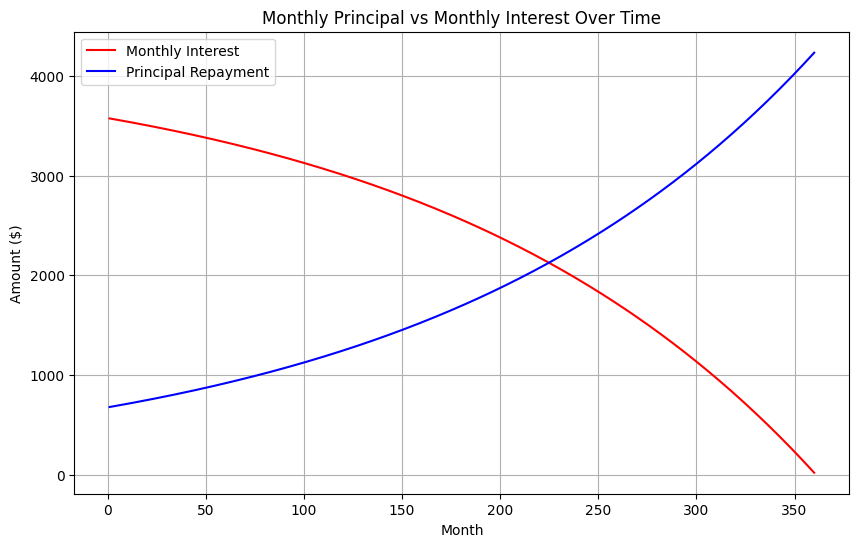

Monthly Payment: 4253.27
Total Interest Paid: 476135.98
Total Principal Paid: 476597.34
Total Payments Made: 1176135.98
Monthly Prepayment Value: 1000.00
Total Prepayments Made: 223402.66
Interest Saved Due to Prepayments: 355042.58
Sum of principal and prepayment: 700000.00
The loan term shortened from 30 years to 18 years and 8 months due to prepayments.


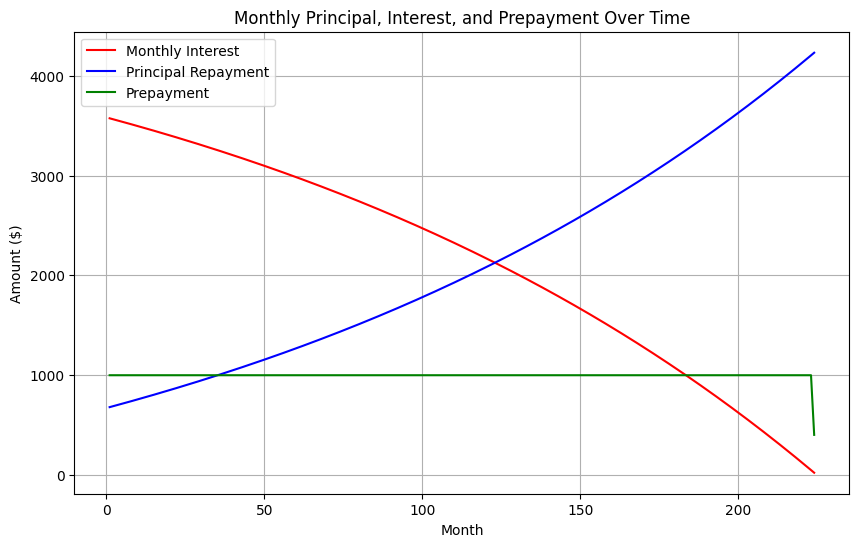

(     Month  Beginning Balance  Monthly Payment  Monthly Interest  \
 0        1      700000.000000      4253.273777       3572.916667   
 1        2      698319.642890      4253.273777       3564.339844   
 2        3      696630.708956      4253.273777       3555.719244   
 3        4      694933.154423      4253.273777       3547.054642   
 4        5      693226.935288      4253.273777       3538.345816   
 ..     ...                ...              ...               ...   
 219    220       25286.577530      4253.273777        129.066906   
 220    221       20162.370659      4253.273777        102.912100   
 221    222       15012.008982      4253.273777         76.623796   
 222    223        9835.359001      4253.273777         50.201312   
 223    224        4632.286535      4253.273777         23.643963   
 
      Principal Repayment   Prepayment  Ending Balance  
 0             680.357110  1000.000000   698319.642890  
 1             688.933933  1000.000000   696630.708956  

In [64]:
#mortgage_analysis_with_prepayment(loan=700000, rate=6.125, term=30, prepayment_type='random', m=1000, std_dev=300)
mortgage_analysis_with_prepayment(loan=700000, rate=6.125, term=30, prepayment_type='constant', m=1000)

In [59]:
import numpy as np

# Parameters for log-normal distribution
mean = 1000  # Mean prepayment value
std_dev = 200  # Standard deviation

# Convert mean and standard deviation to log-normal parameters
mu = np.log(mean**2 / np.sqrt(mean**2 + std_dev**2))  # Mean of the underlying normal distribution
sigma = np.sqrt(np.log(1 + (std_dev**2 / mean**2)))   # Standard deviation of the underlying normal distribution

# Simulate monthly prepayments for a 30-year mortgage (360 months)
num_months = 360
prepayments = np.random.lognormal(mean=mu, sigma=sigma, size=num_months)

# Print the first few simulated prepayments
print(prepayments[:10])

[ 948.57050103  932.0390312   925.97442046  713.51521986  759.84406109
  806.01991138  928.83233061  838.35781308 1036.46730339  838.65873314]
